en fait 
https://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/index.en.html

In [8]:
# <!-- collapse=True -->
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=18)

#params = {'legend.fontsize': 'x-large',
#          'figure.figsize': (15, 5),
#         'axes.labelsize': 'x-large',
#         'axes.titlesize':'x-large',
#         'xtick.labelsize':'x-large',
#         'ytick.labelsize':'x-large'}
#pylab.rcParams.update(params)

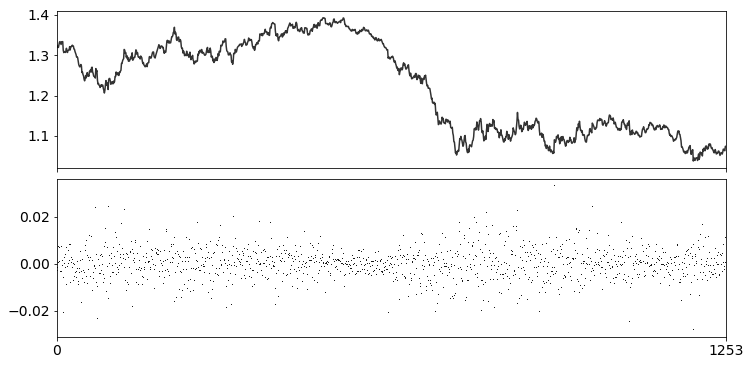

In [9]:
# <!-- collapse=True -->
data = np.load('./timeseriesdata.npy', encoding='bytes').item()
X, Y = data['DEXUSEU.csv']

dY = np.diff( Y, 1)

n_graph = 2
fig, ax = plt.subplots(n_graph, sharex=True, figsize=(12, 3*n_graph));

ax[0].plot(  Y ,  '-k', alpha=0.8  );
#ax[0].set_yticks([0, 160]);

ax[1].plot(  np.diff(Y) ,  ',k', alpha=0.9  );
#ax[1].set_yticks([-10, 0, 10]);
ax[1].set_xlim([0, len(Y)]);

plt.subplots_adjust(wspace=0, hspace=.07);
ax[-1].set_xticks([0, len(Y)]);

In [10]:
def autocorrelation(x):
    """
    Compute the autocorrelation of the signal, based on the properties of the
    power spectral density of the signal.
    http://stackoverflow.com/a/40154897
    """
    xp = x - np.mean(x)
    f = np.fft.fft(xp)
    p = np.array([np.real(v)**2+np.imag(v)**2 for v in f])
    p = np.absolute( f )**2
    pi = np.fft.ifft(p)
    
    return np.real(pi)[:int(x.size/2)]/np.sum(xp**2)

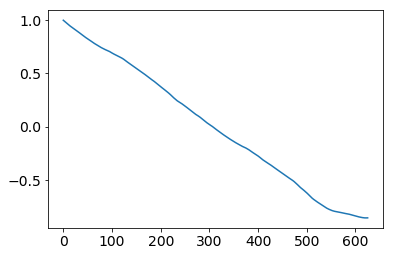

In [11]:
corY = autocorrelation( Y )
plt.plot( corY  );

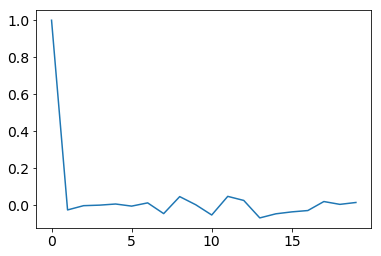

In [12]:
corY = autocorrelation( dY )
plt.plot( corY[:20] );

## moyenne de la dérivée ?

In [26]:
def movingMean( X, n=200 ):
    
    m = []
    for i in range( len(X)-n ):
        m.append( np.mean( X[i:i+n] ) )
        
    return np.array( m )
    

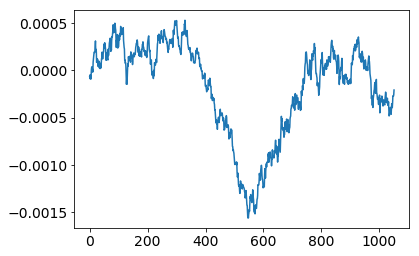

In [27]:
plt.plot( movingMean( dY ) ); 

In [91]:
from scipy.stats import t

# Intervalle de confiance sur la moyenne
def intervalle_confiance( X, alpha = .05 ):
    n = len( X )
    IC =  t.ppf( 1-.5*alpha, n-1 ) * np.sqrt( np.var( X ) / n )
    return IC

def Hzero( X ):
    # est-ce que la moyenne de X est zero ?
    
    m = X.mean()
    IC = intervalle_confiance( X, alpha = .05 )
    if np.abs( m )<IC: 
        return True
    else:
        return False
    
def movingHzero( X, n=200 ):
    
    H0 = []
    for i in range( len(X)-n ):
        H0.append( int( Hzero( X[i:i+n] ) ) )
        
    return np.array( H0 )

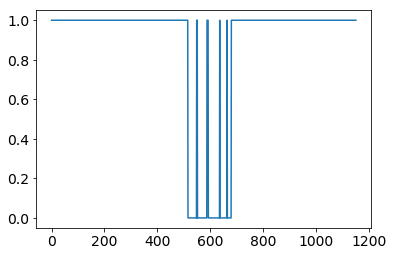

In [92]:
plt.plot( movingHzero( dY, n=100 ) )

In [93]:
def movingMeanIC( X, n=400 ):
    
    m, Ic = [], []
    for i in range( len(X)-n ):
        m.append( np.mean( X[i:i+n] ) )
        Ic.append( intervalle_confiance( X[i:i+n], alpha = .05 ) )
        
    return np.array( m ), np.array( Ic )

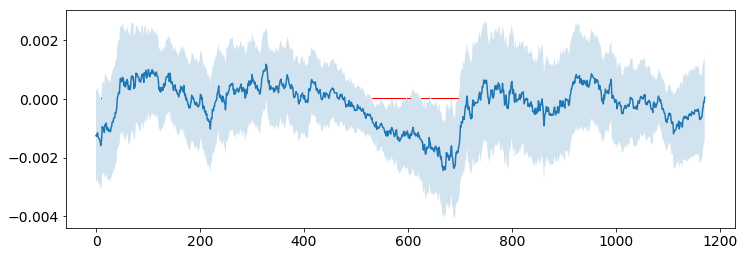

In [94]:
n = 80
m, IC = movingMeanIC( dY, n=n )
plt.figure( figsize=(12, 4) );
plt.plot( m ); 
plt.fill_between( range(len(m)), m-IC, m+IC,  alpha = .2 );
Hzero_dots = np.where( movingHzero( X, n=n )==0 )[0]
plt.plot( Hzero_dots, 0*Hzero_dots , ',r' );

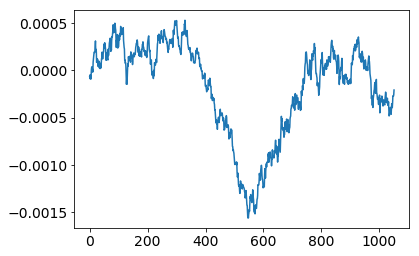

In [43]:
n = 200
rolling_std = []
rolling_mean = []

X = dY 
for i in range( n, len(X) ):
    rolling_std.append( np.std( X[i-n:i] ) )
    rolling_mean.append( np.mean( X[i-n:i] ) )

    
plt.plot(  rolling_mean  )